# Check data
This notebook is used to plot the raw data to;
1. identify bad channels
2. identify the beginning and the end of the experiment

Remember to add the channels, tmin and tmax to event_session_info.py. Remember to run generate_session_info.py after changing the values.

In [106]:
import mne
from pathlib import Path

In [107]:
MEG_data_path = Path("/work/834761")
subject = "0115"
subject_folder = "20230928_000000"
recording_name = "001.self_block1"
#['001.self_block1',  '002.other_block1', '003.self_block2',  '004.other_block2', '005.self_block3',  '006.other_block3']

# get the fif file in the folder by listing files in path
fif_file_path = list((MEG_data_path / subject / subject_folder / "MEG" / recording_name / "files").glob("*.fif"))[0]

# read fif file
raw = mne.io.read_raw_fif(fif_file_path, preload=True)

Opening raw data file /work/834761/0115/20230928_000000/MEG/001.self_block1/files/self_block1.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 204000 ... 582999 =    204.000 ...   582.999 secs
Ready.
Reading 0 ... 378999  =      0.000 ...   378.999 secs...


/tmp/ipykernel_5916/3055221929.py:11: RuntimeWarning: This filename (/work/834761/0115/20230928_000000/MEG/001.self_block1/files/self_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file_path, preload=True)


In [108]:
# initial preprocessing to make it easier to look at!

raw.apply_proj()

Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...


<Raw | self_block1.fif, 323 x 379000 (379.0 s), ~939.2 MB, data loaded>

In [109]:
events = mne.find_events(raw, min_duration=0.002)

sampling_rate = 1/raw.info["sfreq"]

tmin = (events[0][0] - raw.first_samp) * sampling_rate - 1
tmax = (events[-2][0] - raw.first_samp) * sampling_rate + 1

raw.crop(tmin = tmin, tmax = tmax)

160 events found
Event IDs: [ 11  12  23 202]


<Raw | self_block1.fif, 323 x 356908 (356.9 s), ~884.7 MB, data loaded>

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 20.11% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

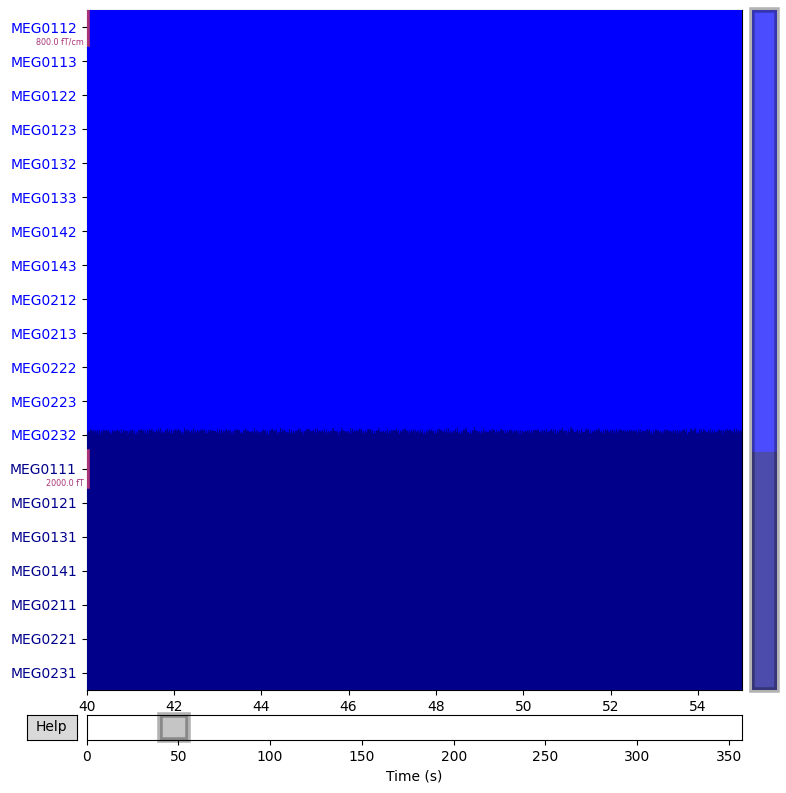

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 22.55% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

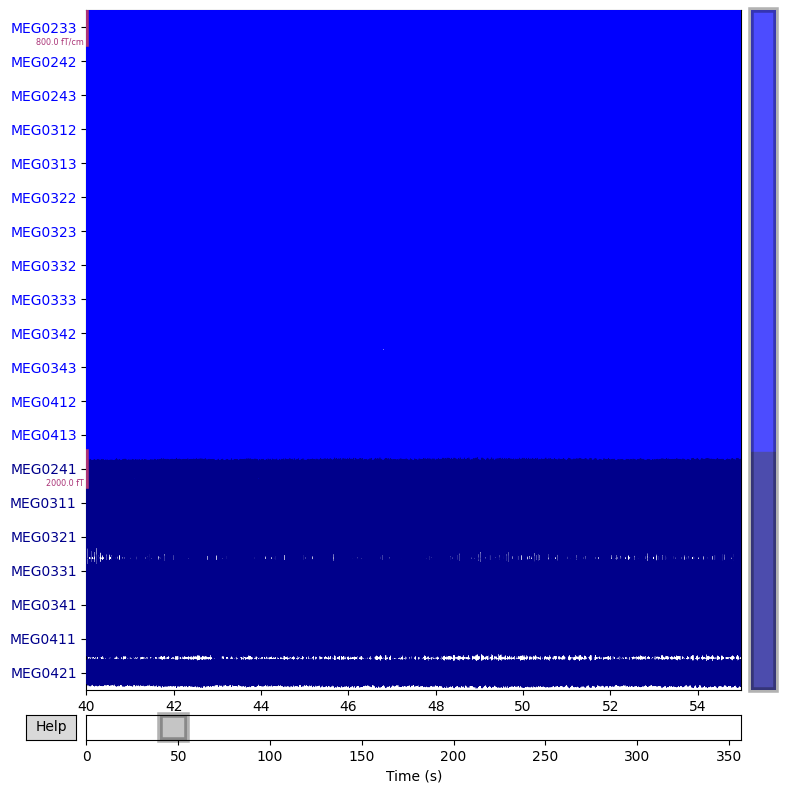

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 31.63% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

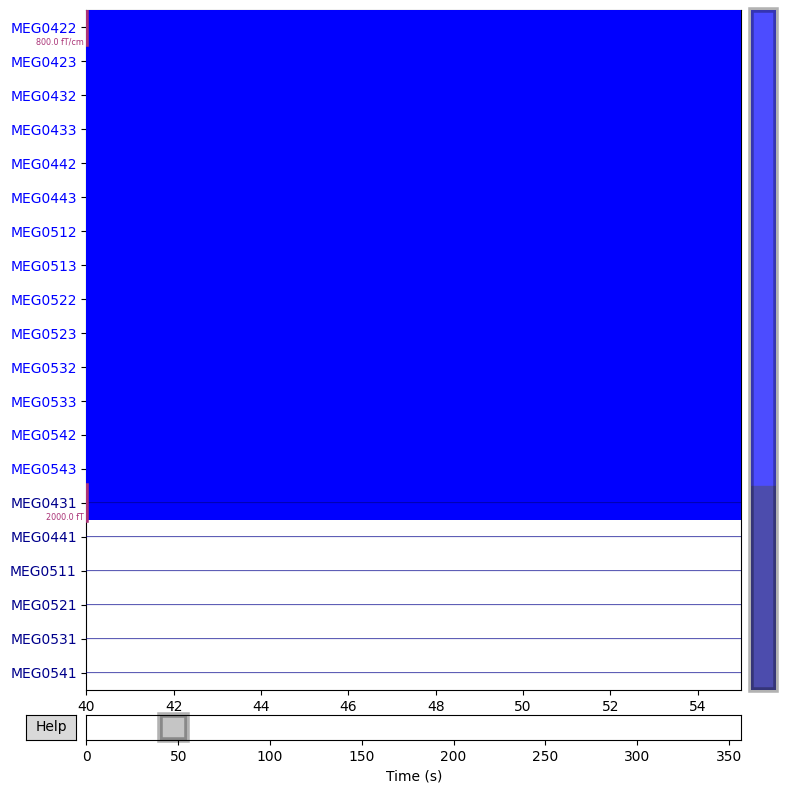

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 36.05% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

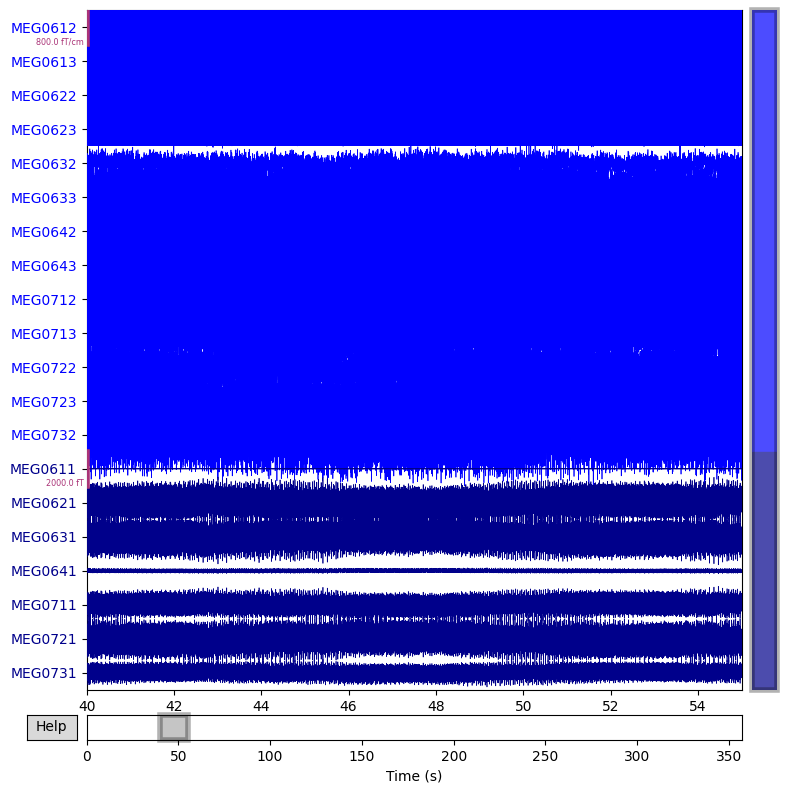

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 21.68% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

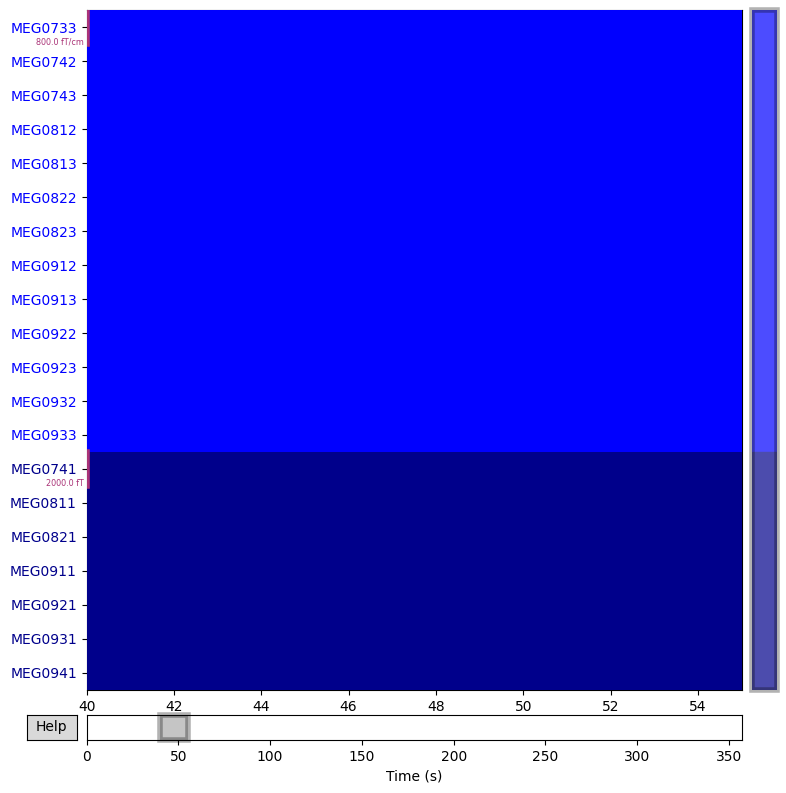

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 30.26% of its original magnitude by subselecting 14/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

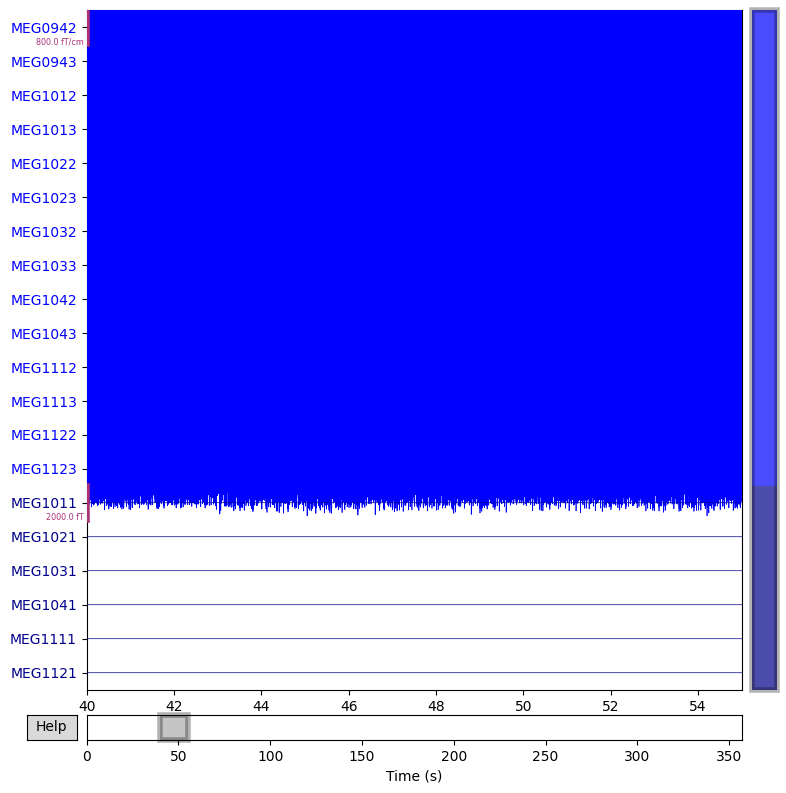

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 19.84% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

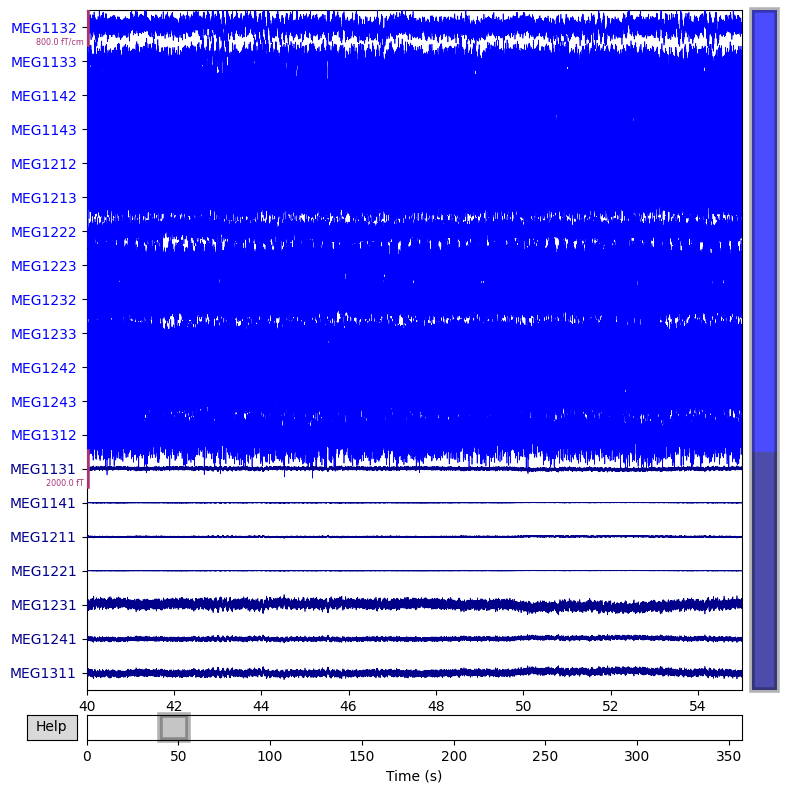

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 20.45% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

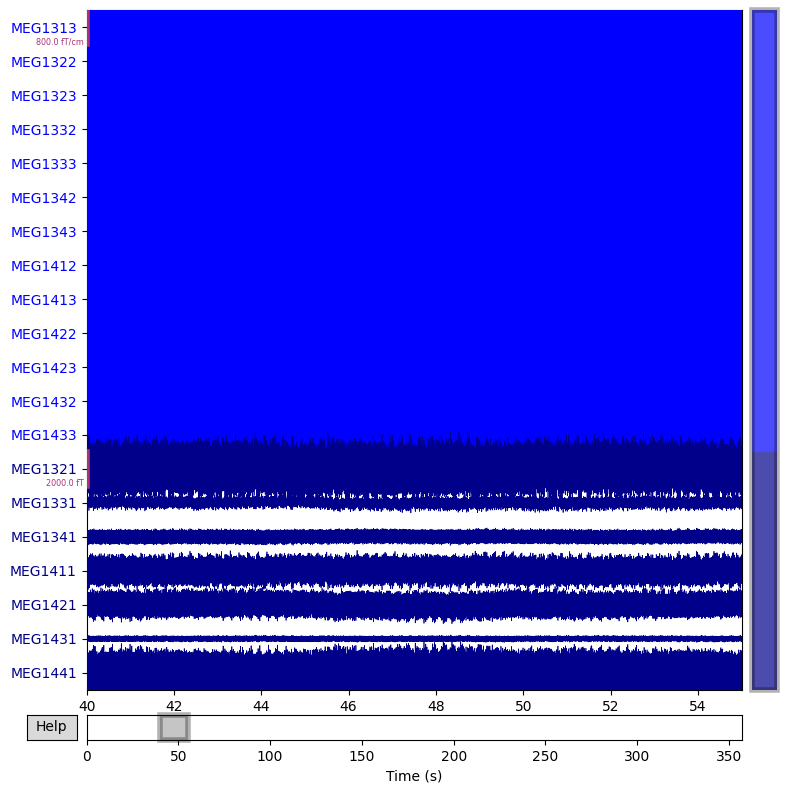

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 22.79% of its original magnitude by subselecting 14/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

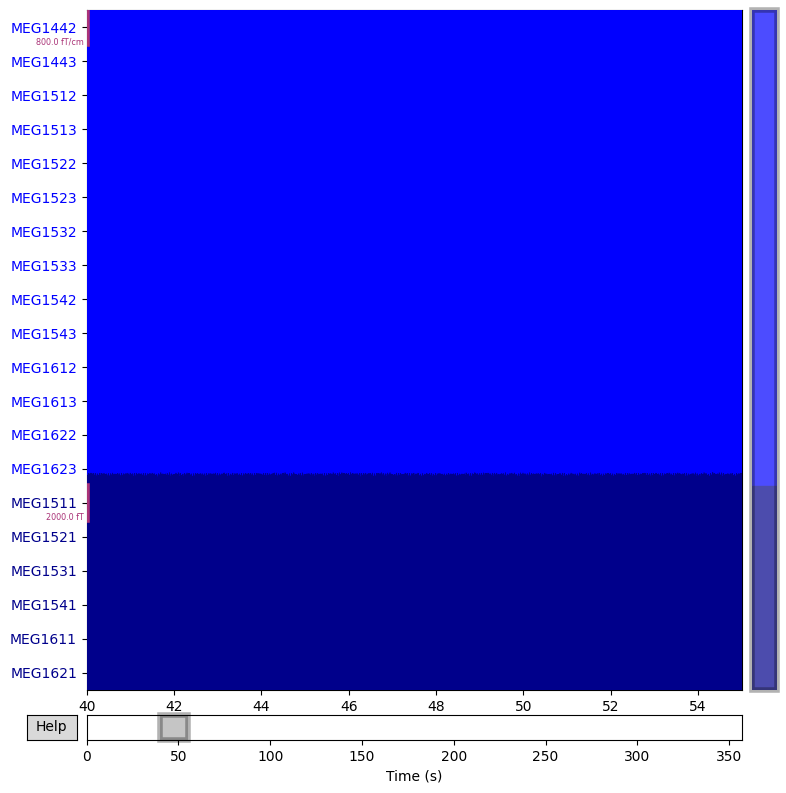

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 20.56% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

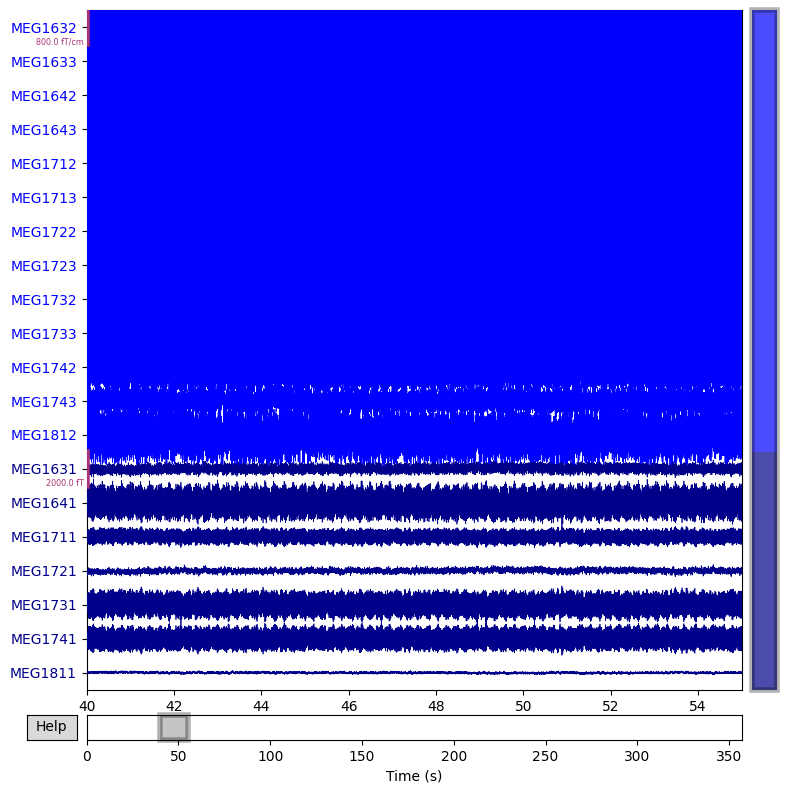

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 28.25% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

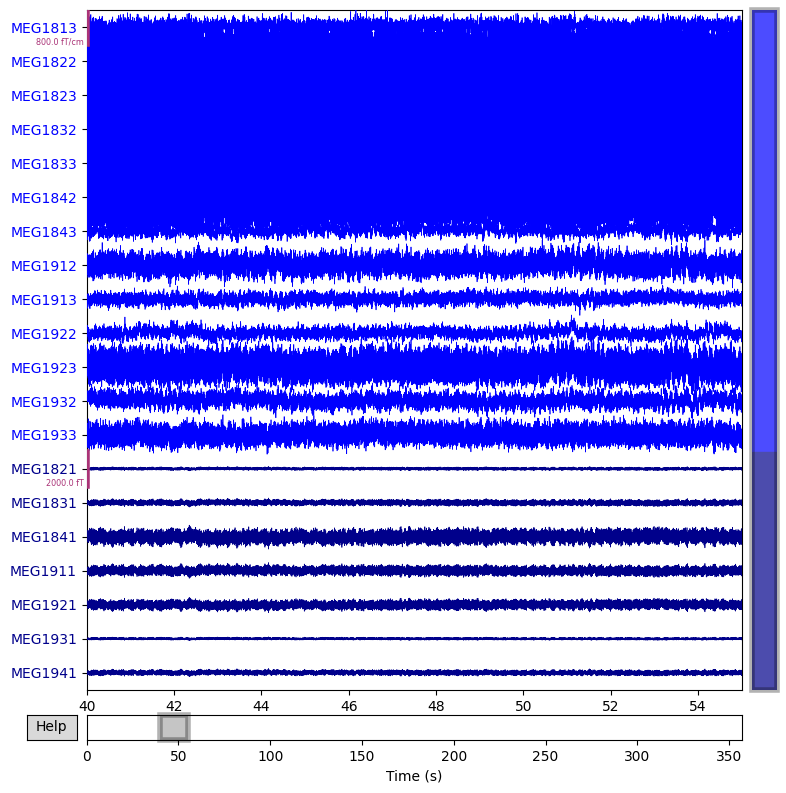

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 26.57% of its original magnitude by subselecting 14/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

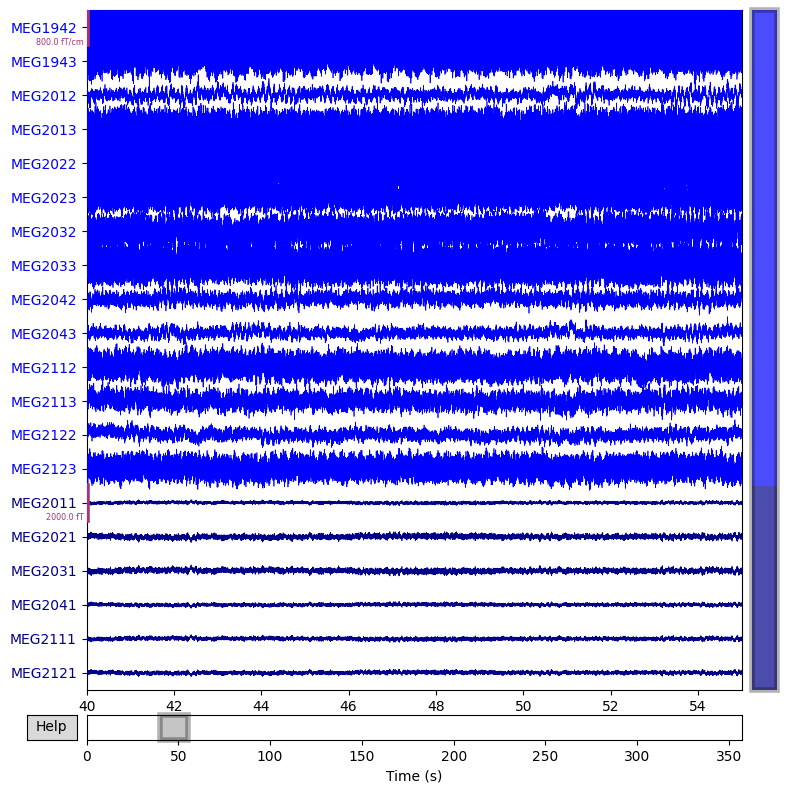

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 25.24% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

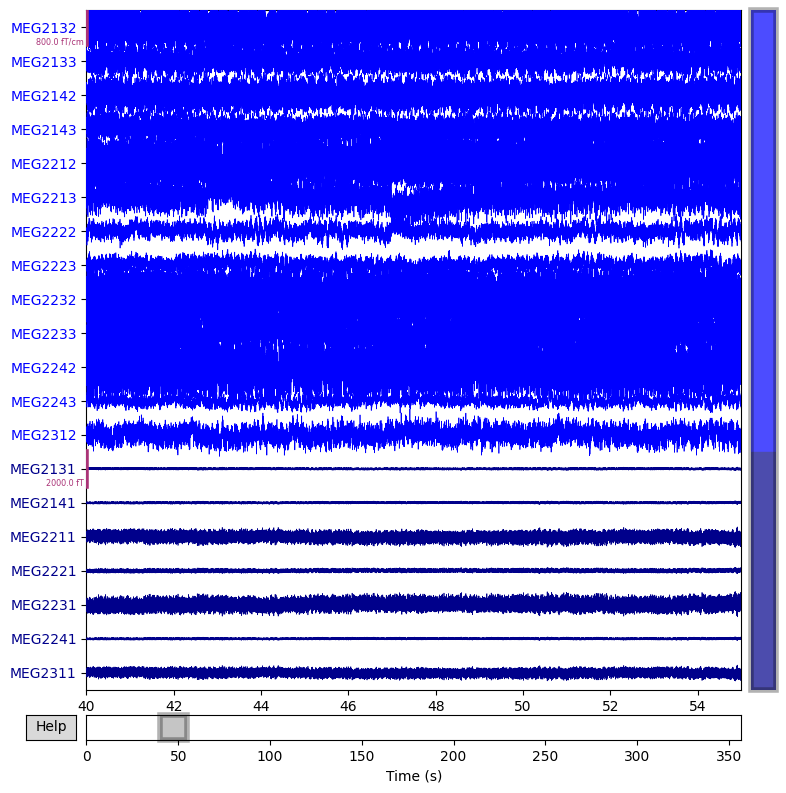

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 27.39% of its original magnitude by subselecting 13/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

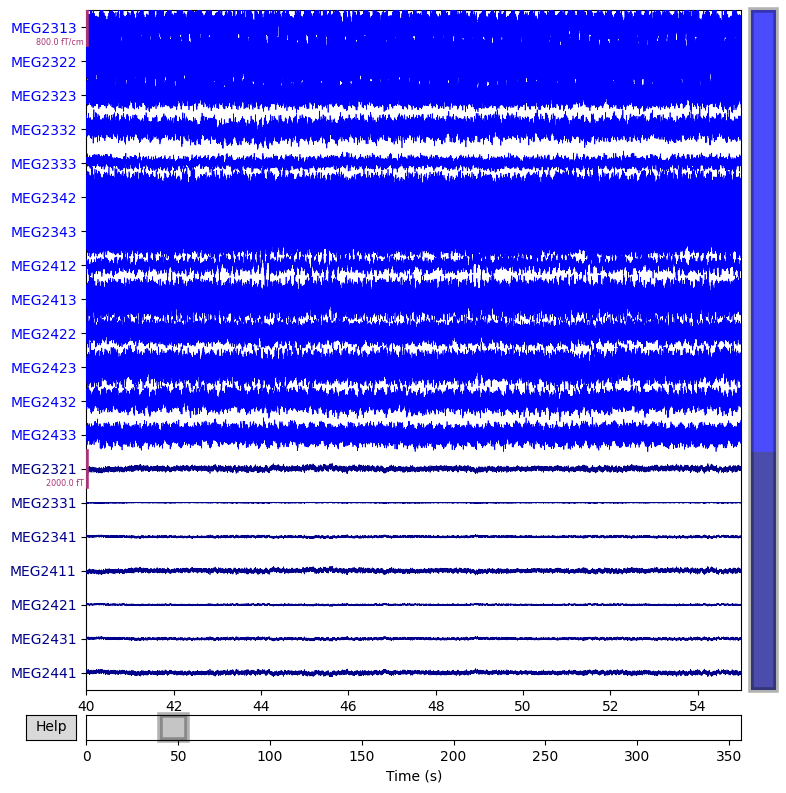

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 22.95% of its original magnitude by subselecting 14/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-0

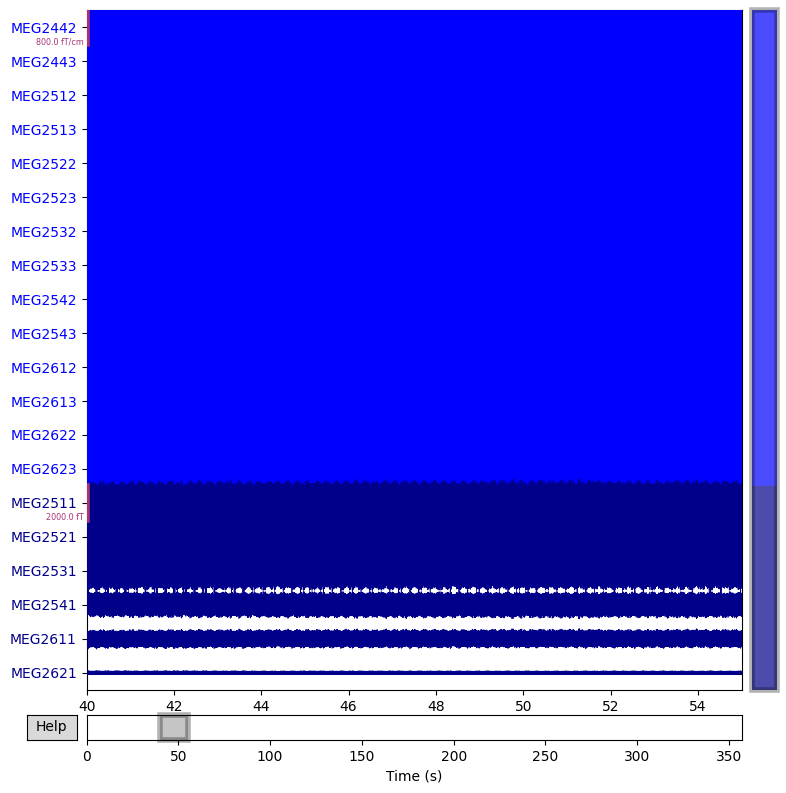

/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-01' has been reduced to 15.14% of its original magnitude by subselecting 4/203 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
/work/LauraBockPaulsen#1941/MEG_portfolio/env/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py:27: RuntimeWarning: Projection vector 'planar-Raw-0.000-120.000-PCA-02

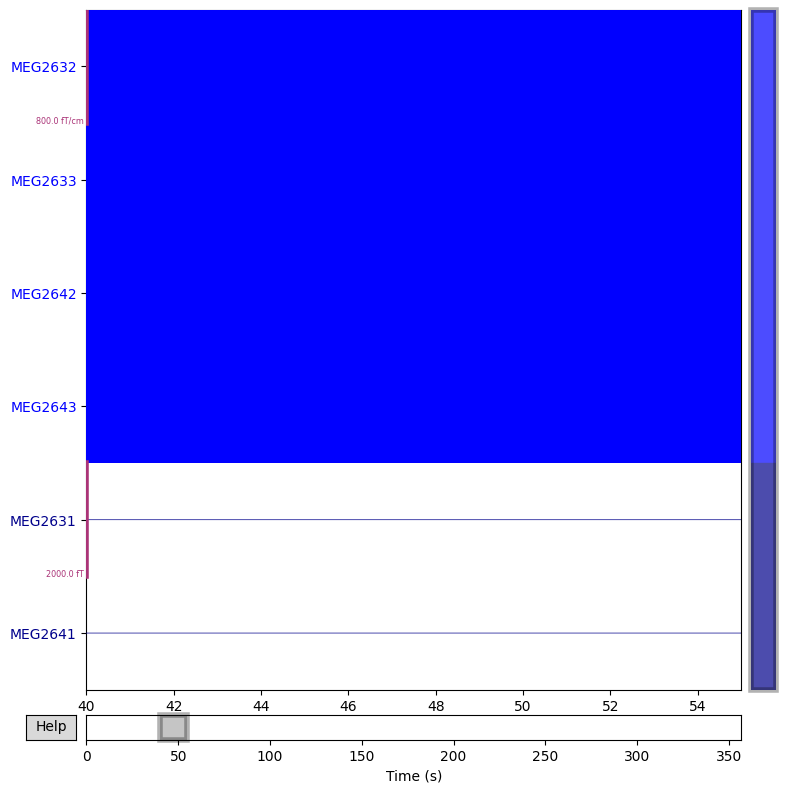

In [111]:
# get channel names
chs = raw.ch_names
chs = [ch for ch in chs if ch.startswith("MEG")]


# plot 20 channels at a time
for i in range(0, len(chs), 20):
    raw_tmp = raw.copy().pick(chs[i:i+20])
    raw_tmp.plot(start = 40, duration=15);